In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
#Data collection and preprocessing

In [27]:
rmd = pd.read_csv('mail_data.csv')

In [28]:
rmd

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
#replace the null values with a null string
md = rmd.where((pd.notnull(rmd)),'')

In [30]:
md

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#Label encoding

# Label spam mail as 0 and ham mail as 1

In [31]:
for i in range(md.shape[0]):
    if md.loc[i, 'Category'] == 'spam':
        md.loc[i, 'Category'] = 0
    else:
        md.loc[i, 'Category'] = 1

In [32]:
md

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [33]:
x = md['Message']
y = md['Category']

In [34]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [35]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [36]:
#Split the data as training and test data

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)

In [38]:
xtrain.shape

(4457,)

In [39]:
#Feature Extraction

## transform the text data to feature vectors that can be used as input to the logistic regression model

fe = TfidfVectorizer(min_df = 1,stop_words = 'english',lowercase = True)

In [40]:
# x_train_features

xtf  = fe.fit_transform(xtrain)

In [41]:
xtef = fe.fit_transform(xtest)

In [42]:
#Convert ytrain and ytest values as integers

ytrain = ytrain.astype('int')
ytest = ytest.astype('int')


In [43]:
#Machines understand numbers rather than text

print(xtf)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [44]:
print(xtef)

  (0, 123)	0.21454496240397508
  (0, 602)	0.27496518403029063
  (0, 446)	0.24056653549202825
  (0, 90)	0.27496518403029063
  (0, 2374)	0.2229220378541843
  (0, 461)	0.24056653549202825
  (0, 167)	0.22793496582991604
  (0, 9)	0.24894361094223744
  (0, 12)	0.23372196647595156
  (0, 4)	0.2597435395640047
  (0, 2303)	0.19462454405004664
  (0, 665)	0.2597435395640047
  (0, 582)	0.23372196647595156
  (0, 1)	0.24056653549202825
  (0, 3217)	0.19247874892161249
  (0, 15)	0.27496518403029063
  (0, 1934)	0.17330174484963604
  (0, 3070)	0.2019133927418629
  (1, 1956)	0.3151825941036615
  (1, 1548)	0.40394441808274295
  (1, 2908)	0.3051274103611202
  (1, 2110)	0.40394441808274295
  (1, 2980)	0.40394441808274295
  (1, 3272)	0.2646484069642073
  (1, 2746)	0.3657167812431158
  :	:
  (1111, 3010)	0.40198995150492556
  (1111, 1422)	0.42477003412755865
  (1112, 1067)	0.34079718857361213
  (1112, 2702)	0.34079718857361213
  (1112, 732)	0.34079718857361213
  (1112, 3005)	0.28967954384408806
  (1112, 468)	0

In [45]:
#Training the machine learning model

In [47]:
model = LogisticRegression()

In [48]:
#train the model with data

model.fit(xtf,ytrain)

LogisticRegression()

In [9]:
#Evaluating the model

# how much efficiently the model is predicting the values

In [49]:
output = model.predict(xtf)

In [52]:
output

array([1, 1, 1, ..., 1, 1, 0])

In [53]:
acc = accuracy_score(ytrain,output)

In [54]:
acc

0.9670181736594121

In [55]:
# from above out of 100 mails it can give 96% correct answer so our model is good enough
xtef.shape

(1115, 3296)

In [56]:
#predict with test data

out = model.predict(xtf)

In [57]:
out

array([1, 1, 1, ..., 1, 1, 0])

In [58]:
#Build a predictive system

In [59]:
input_mail = ["Hi , Summer is right around the corner in many parts of the world, and we are ready to enjoy warmer weather and spend time with family and friends. Some of us are planning trips abroad while others are looking forward to staycations. Either way, we want to know about your travel plans and if you are taking work with you this summer. June is also a busy month here at Topcoder. Read more about what we're up to below."]

In [60]:
#Convert text to feature vectors

idf = fe.transform(input_mail)

In [61]:
print(idf)

  (0, 3229)	0.19371002073809743
  (0, 3226)	0.15064155363349616
  (0, 3165)	0.22074246595879868
  (0, 3160)	0.1543993389509925
  (0, 3144)	0.13579446485505542
  (0, 2936)	0.14146325845760996
  (0, 2842)	0.19371002073809743
  (0, 2802)	0.4088898639081627
  (0, 2710)	0.20444493195408134
  (0, 2461)	0.1715956450688287
  (0, 2381)	0.1715956450688287
  (0, 2378)	0.22074246595879868
  (0, 2215)	0.2336785464521812
  (0, 2214)	0.21156417078291248
  (0, 1956)	0.18233055628481262
  (0, 1783)	0.19371002073809743
  (0, 1676)	0.13098256611744405
  (0, 1642)	0.2336785464521812
  (0, 1450)	0.1618526572733359
  (0, 1253)	0.18233055628481262
  (0, 1231)	0.2336785464521812
  (0, 1135)	0.18569200979614742
  (0, 1077)	0.19862809028952996
  (0, 646)	0.21156417078291248


In [63]:
output = model.predict(idf)
print(output)

ValueError: X has 3296 features, but LogisticRegression is expecting 7431 features as input.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rmd = pd.read_csv('mail_data.csv')

# Replace the null values with a null string
md = rmd.where((pd.notnull(rmd)), '')

for i in range(md.shape[0]):
    if md.loc[i, 'Category'] == 'spam':
        md.loc[i, 'Category'] = 0
    else:
        md.loc[i, 'Category'] = 1

x = md['Message']
y = md['Category']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

# Feature Extraction
## Transform the text data to feature vectors that can be used as input to the logistic regression model
fe = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# x_train_features
xtf = fe.fit_transform(xtrain)
xtef = fe.transform(xtest)

# Convert ytrain and ytest values to integers
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

model = LogisticRegression()
# Train the model with data
model.fit(xtf, ytrain)

output = model.predict(xtf)
# acc = accuracy_score(ytrain, output)

# Predict with test data
# out = model.predict(xtef)
output
acc = accuracy_score(ytrain, output)
acc

0.9670181736594121

In [43]:
xtrain

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object

In [44]:
output

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
acc = accuracy_score(ytrain, output)

In [46]:
acc

0.9670181736594121

In [47]:
acc = accuracy_score(ytrain, output)
acc

0.9670181736594121

In [48]:
# Convert input mail to feature vectors
input_mail = ["Hi, Summer is right around the corner in many parts of the world, and we are ready to enjoy warmer weather and spend time with family and friends. Some of us are planning trips abroad while others are looking forward to staycations. Either way, we want to know about your travel plans and if you are taking work with you this summer. June is also a busy month here at Topcoder. Read more about what we're up to below."]
idf = fe.transform(input_mail)

output = model.predict(idf)

if(output==1):
    print('Not Spam/Ham Mail')
else:
    print('Spam Mail')

Not Spam/Ham Mail


In [49]:
acc

0.9670181736594121

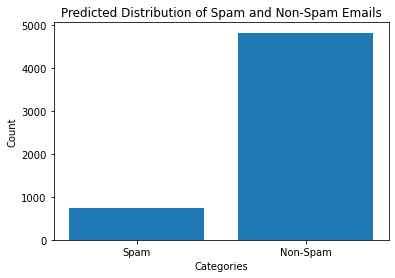

In [50]:
# Convert the predicted values to a pandas Series
output_series = pd.Series(output)

# Count the occurrences of spam and non-spam predictions
spam_count = (md['Category']== 0).sum()
non_spam_count = (md['Category'] == 1).sum()

# Create a histogram plot
categories = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Predicted Distribution of Spam and Non-Spam Emails')

plt.show()

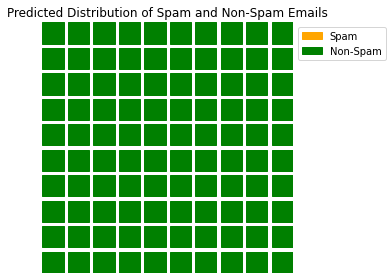

In [51]:
from pywaffle import Waffle

# Convert the predicted values to a pandas Series
output_series = pd.Series(output)

# Count the occurrences of spam and non-spam predictions
spam_count = (category == 0).sum()
non_spam_count = (4825

# Calculate the proportions of spam and non-spam predictions
total_count = spam_count + non_spam_count
spam_proportion = spam_count / total_count
non_spam_proportion = non_spam_count / total_count

# Create a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # Adjust the number of rows for the desired size
    columns=10,  # Adjust the number of columns for the desired size
    values=[spam_proportion, non_spam_proportion],
    labels=['Spam', 'Non-Spam'],
    colors=['#FFA500', '#008000'],  # Adjust colors as needed
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.title('Predicted Distribution of Spam and Non-Spam Emails')

plt.show()

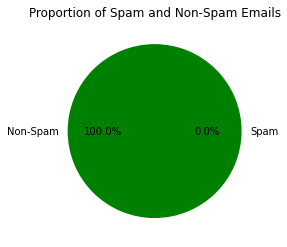

In [52]:
# Calculate the proportion of spam and non-spam emails
spam_proportion = spam_count / len(md)
non_spam_proportion = non_spam_count / len(md)

# Create a pie chart
labels = ['Spam', 'Non-Spam']
proportions = [spam_proportion, non_spam_proportion]
colors = ['#FFA500', '#008000']

plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Spam and Non-Spam Emails')

plt.show()

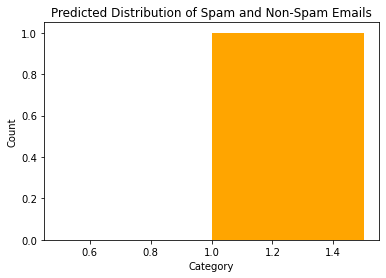

In [53]:
# Convert the predicted values to a pandas Series
output_series = pd.Series(output)

# Create a histogram
plt.hist(output_series, bins=2, color=['#FFA500'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Predicted Distribution of Spam and Non-Spam Emails')

plt.show()

In [43]:
import matplotlib.pyplot
as plt
plt.scatter(xtest,ytrain, color="purple")
plt.plot(ytest, regressor.predict(ytest), color="blue")
plt.xlable("Message")
plt.ylable("category")
plt.show()

SyntaxError: invalid syntax (2443030242.py, line 2)

ValueError: x and y must be the same size

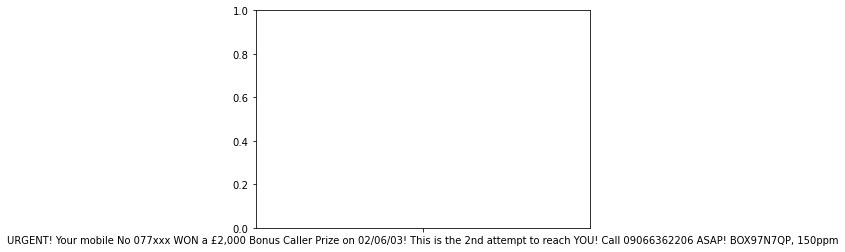

In [44]:
import matplotlib.pyplot as plt

# Assuming you have imported the necessary libraries and defined xtest, ytest, and regressor

plt.scatter(xtest, ytrain, color="purple")
plt.plot(ytest, regressor.predict(ytest), color="blue")
plt.xlabel("Message")
plt.ylabel("Category")
plt.show()